# PyAnsys Geometry 101: Sketching

With PyAnsys Geometry, you can build powerful dynamic sketches without communicating
with the Geometry service. This example shows how to build some simple sketches.

## Perform required imports

Perform the required imports.

In [1]:
from pint import Quantity

from ansys.geometry.core.math import Plane, Point2D, Point3D, Vector3D
from ansys.geometry.core.misc import UNITS
from ansys.geometry.core.sketch import Sketch

## Add a box to sketch

The ``Sketch`` object is the starting point. Once it is created, you can
dynamically add various curves to the sketch. Here are some of the curves that
are available:

- ``arc``
- ``box``
- ``circle``
- ``ellipse``
- ``gear``
- ``polygon``
- ``segment``
- ``slot``
- ``trapezoid``
- ``triangle``

Add a box to the sketch.

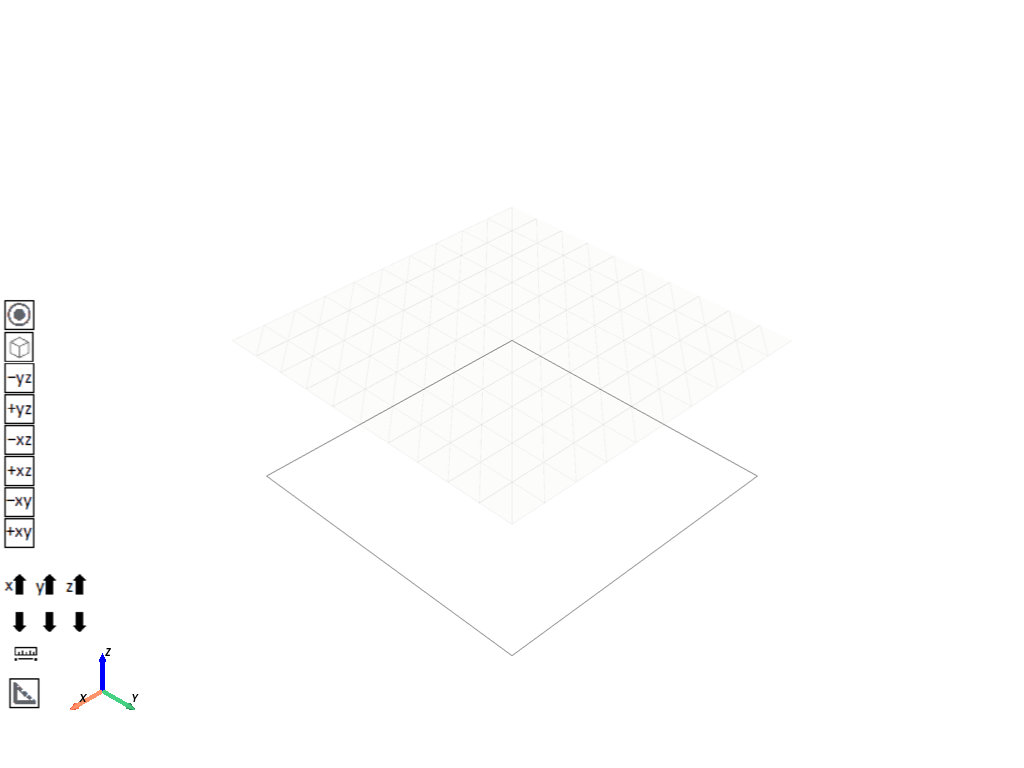

In [2]:
sketch = Sketch()

sketch.segment(Point2D([0,0]), Point2D([0,1]))
sketch.segment(Point2D([0,1]), Point2D([1,1]))
sketch.segment(Point2D([1,1]), Point2D([1,0]))
sketch.segment(Point2D([1,0]), Point2D([0,0]))

sketch.plot()

A *functional-style sketching API* is also implemented. It allows you
to append curves to the sketch with the idea of *never picking up your pen*.

Use the functional-style sketching API to add a box.

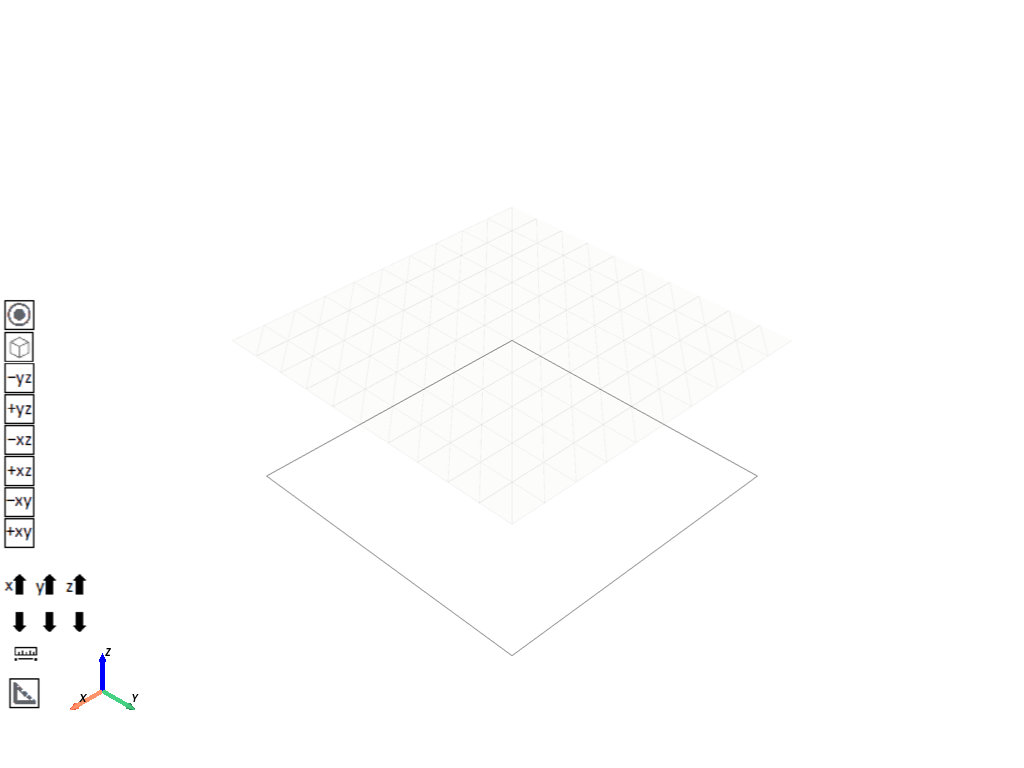

In [3]:
sketch = Sketch()

(
    sketch.segment(Point2D([0,0]), Point2D([0,1]))
        .segment_to_point(Point2D([1,1]))
        .segment_to_point(Point2D([1,0]))
        .segment_to_point(Point2D([0,0]))
)

sketch.plot()

A ``Sketch`` object uses the XY plane by default. You can define your
own custom plane using three parameters: ``origin``, ``direction_x``,
and ``direction_y``.

Add a box on a custom plane.

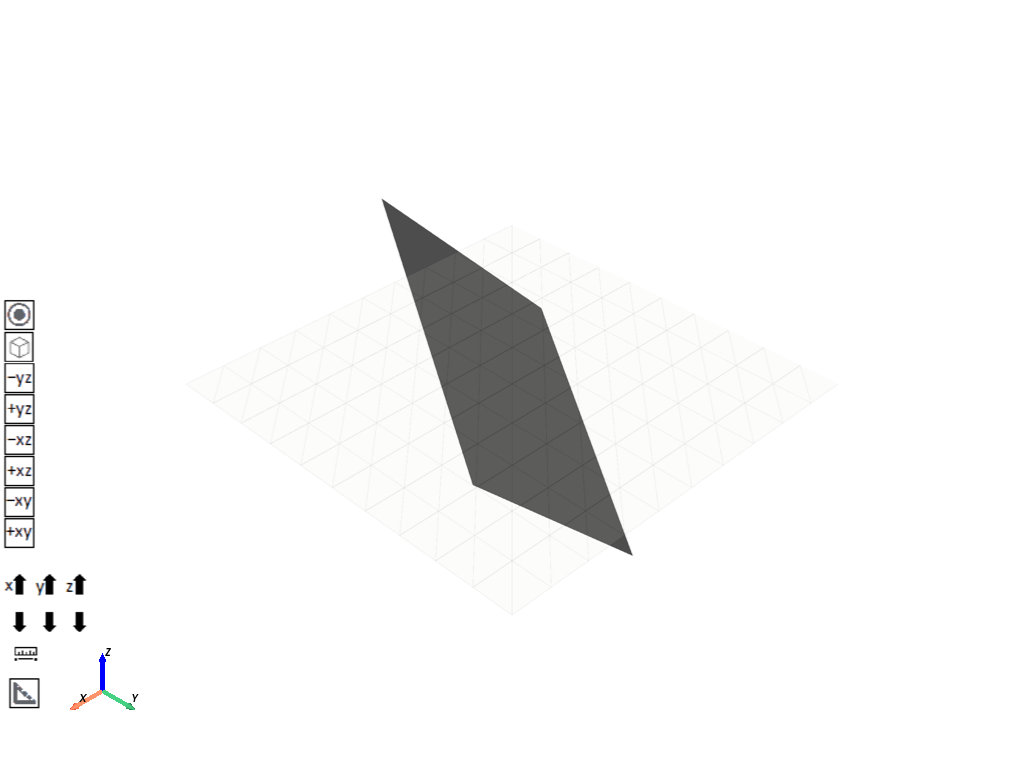

In [4]:
plane = Plane(origin=Point3D([0,0,0]), direction_x=Vector3D([1,2,-1]), direction_y=Vector3D([1,0,1]))

sketch = Sketch(plane)

sketch.box(Point2D([0,0]), 1, 1)

sketch.plot()

## Combine concepts to create powerful sketches

Combine these simple concepts to create powerful sketches.

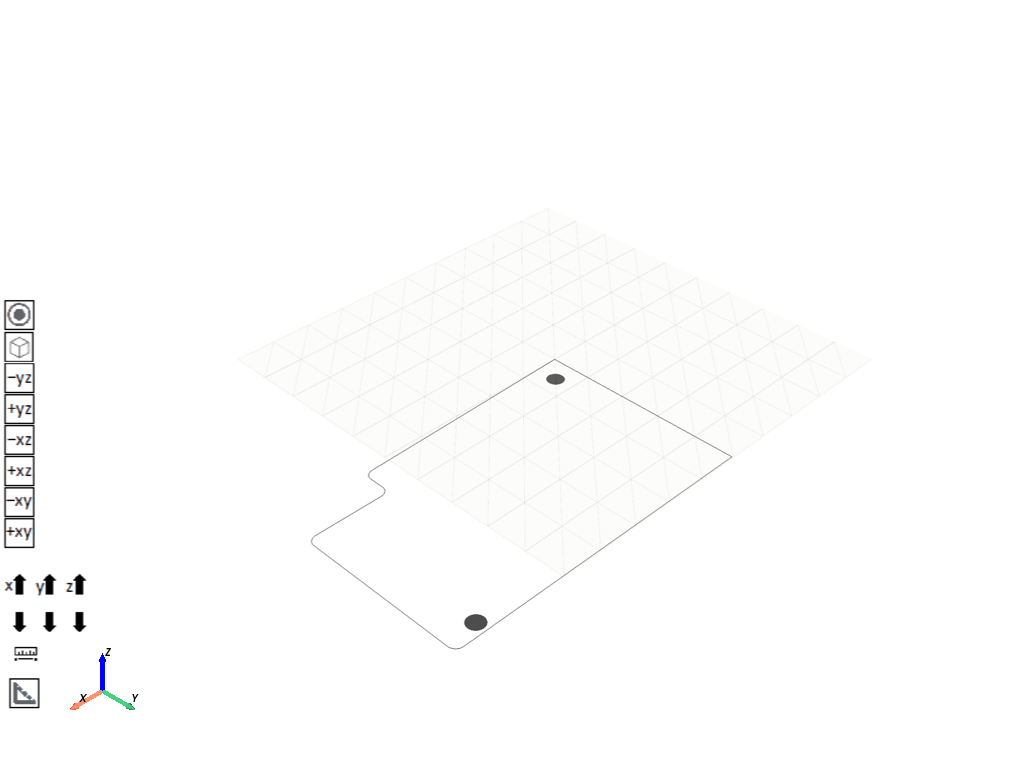

In [5]:
# Complex Fluent API Sketch - PCB

sketch = Sketch()

(
    sketch.segment(Point2D([0, 0], unit=UNITS.mm), Point2D([40, 1], unit=UNITS.mm), "LowerEdge")
      .arc_to_point(Point2D([41.5, 2.5], unit=UNITS.mm), Point2D([40, 2.5], unit=UNITS.mm), tag="SupportedCorner")
      .segment_to_point(Point2D([41.5, 5], unit=UNITS.mm))
      .arc_to_point(Point2D([43, 6.5], unit=UNITS.mm), Point2D([43, 5], unit=UNITS.mm), True)
      .segment_to_point(Point2D([55, 6.5], unit=UNITS.mm))
      .arc_to_point(Point2D([56.5, 8], unit=UNITS.mm), Point2D([55, 8], unit=UNITS.mm))
      .segment_to_point(Point2D([56.5, 35], unit=UNITS.mm))
      .arc_to_point(Point2D([55, 36.5], unit=UNITS.mm), Point2D([55, 35], unit=UNITS.mm))
      .segment_to_point(Point2D([0, 36.5], unit=UNITS.mm))
      .segment_to_point(Point2D([0, 0], unit=UNITS.mm))
      .circle(Point2D([4, 4], UNITS.mm), Quantity(1.5, UNITS.mm), "Anchor1")
      .circle(Point2D([51, 34.5], UNITS.mm), Quantity(1.5, UNITS.mm), "Anchor2")
)

sketch.plot()